---
title: MergingHDF
subtitle: A short Jupyter Notebook to merge `.hdf`files for spatial statistics.

# Summary for listings and search engines
summary: This Notebook is intended to help extract coordinate data from .h5 and .csv files before and after DeepLabCut and Anipose analyses.

# Link this post with a project
projects: []

# Date published
date: "2022-04-14T00:00:00Z"

# Date updated
lastmod: ""

# Is this an unpublished draft?
draft: false

# Show this page in the Featured widget?
featured: false

diagram: true

# Featured image
# Place an image named `featured.jpg/png` in this page's folder and customize its options here.
image:
  caption: 
  focal_point: ""
  placement: 2
  preview_only: false

authors:
- admin

tags:
- code

categories:

---

This Notebook is intended to help extract coordinate data from h5 and csv files before and after DeepLabCut and Anipose analyses. Specifically, pose coordinates and arena reference coordinates are analyzed separately, and need to be merged before triangulation.

In [3]:
# import 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter
import tkinter.filedialog

## 1. Read pose data

First test with data from '20220201_HexagonalArena_P175'   
see reference data here: F:\HexagonalArena_local\ArenaReference\20220201_P175   
and pose data here: F:\PigeonTriangulation_local\hexArenaLoc\trial3\pose-2d

In [105]:
poseref = r'F:\PigeonTriangulation_local\hexArenaLoc\trial3\pose-2d'
arenaref = r'F:\HexagonalArena_local\ArenaReference\20220201_P175'

In [132]:
# read data in h5 format
posefile = tkinter.filedialog.askopenfilename(initialdir = poseref ,title = "Select a h5 pose file:")
df_pose = pd.read_hdf(posefile)
df_pose

scorer    DLC_resnet101_PigeonSuperModel_01Nov4shuffle1_2000000              \
bodyparts                                     US(UpperSpine=LN)               
coords                                                        x           y   
0                                                 640.989230     344.466683   
1                                                 640.797319     344.915719   
2                                                 640.351147     345.349218   
3                                                 640.055052     345.765333   
4                                                 640.117920     346.160631   
...                                                      ...            ...   
4495                                              367.769209     687.466753   
4496                                              367.091518     685.363973   
4497                                              367.228496     683.859409   
4498                                              368.281775     682.548541   
4499                                              368.867873     681.521099   

scorer                                                                      \
bodyparts            LS(LowerSpine)                        MS(MiddleSpine)   
coords    likelihood              x           y likelihood               x   
0           0.916727     645.478724  303.430606   0.796740      644.039045   
1           0.908827     646.744630  304.058914   0.750711      644.789697   
2           0.892289     649.796389  304.715229   0.771619      646.153409   
3           0.888938     650.429135  305.198964   0.846084      646.828756   
4           0.904219     651.150858  305.977508   0.893099      647.577388   
...              ...            ...         ...        ...             ...   
4495        0.984717     367.728103  758.201678   0.999123      369.199896   
4496        0.983964     366.850518  756.647971   0.998817      369.054607   
4497        0.986913     366.698533  755.202582   0.998526      369.000118   
4498        0.990507     365.685280  753.781854   0.998077      368.827694   
4499        0.991017     364.851850  750.338995   0.997715      368.473056   

scorer                                                ...               \
bodyparts                        UHS(UpperHalfSpine)  ... LF(LeftFoot)   
coords              y likelihood                   x  ...   likelihood   
0          327.999838   0.287272          643.403307  ...     0.598591   
1          328.150457   0.294618          643.372980  ...     0.668564   
2          329.591538   0.321961          643.505822  ...     0.698718   
3          329.627438   0.435219          643.754732  ...     0.740604   
4          329.356055   0.518741          644.139544  ...     0.786127   
...               ...        ...                 ...  ...          ...   
4495       722.016626   0.983162          367.103288  ...     0.022135   
4496       720.689996   0.983464          367.418953  ...     0.020133   
4497       719.656308   0.985458          366.602570  ...     0.022452   
4498       718.538765   0.984765          367.268499  ...     0.022139   
4499       717.533381   0.971233          367.376853  ...     0.025810   

scorer                                                                      \
bodyparts RT(RightTibia)                        RA(RightAnkle)               
coords                 x           y likelihood              x           y   
0             628.180593  374.697701   0.001180     633.750403  378.864707   
1             627.937303  374.865241   0.001080     633.416549  379.330903   
2             627.714704  375.242991   0.000919     632.968455  379.741385   
3             626.641231  381.648432   0.000836     628.975853  376.691483   
4             626.529260  382.037743   0.000849     628.322321  377.500684   
...                  ...         ...        ...            ...         ...   
4495          386.145338  705.711202   0.003760     392.22067

## 2. Read Arena Reference Data

Load arena reference pose for given camera

In [133]:
# read data in h5 format
reffile = tkinter.filedialog.askopenfilename(initialdir = arenaref ,title = "Select a h5 pose file:")
df_ref = pd.read_hdf(reffile)
df_ref

scorer    DLC_resnet50_Hex_refMar1shuffle1_1000000                         \
bodyparts                                       cA                          
coords                                           x           y likelihood   
0                                      1061.839355  989.153809   0.999989   
1                                      1061.846069  989.112366   0.999990   
2                                      1061.864502  989.131165   0.999990   
3                                      1061.853882  989.137878   0.999990   
4                                      1061.848999  989.155518   0.999990   
..                                             ...         ...        ...   
898                                    1061.932007  988.934814   0.999991   
899                                    1061.925415  988.930481   0.999991   
900                                    1061.877563  988.915161   0.999992   
901                                    1061.883545  988.912720   0.999992   
902                                    1061.877930  988.921265   0.999992   

scorer                                                                 \
bodyparts          cB                                  cC               
coords              x            y likelihood           x           y   
0          443.004608  1012.047302   0.999962  212.833771  534.219910   
1          443.032837  1012.004639   0.999964  212.880737  534.243347   
2          443.025574  1011.989929   0.999964  212.875275  534.236328   
3          443.019714  1012.013428   0.999964  212.896439  534.219299   
4          443.021393  1012.016235   0.999964  212.874298  534.204895   
..                ...          ...        ...         ...         ...   
898        443.145477  1012.229858   0.999964  212.982803  534.407654   
899        443.146484  1012.234985   0.999964  212.978928  534.405823   
900        443.235992  1012.176941   0.999959  212.847198  534.518127   
901        443.234283  1012.165466   0.999960  212.850342  534.518311   
902        443.233826  1012.173462   0.999959  212.848892  534.520264   

scorer                                                               \
bodyparts                     cD                                 cE   
coords    likelihood           x           y likelihood           x   
0           0.999937  489.620056  164.377884   0.999988  942.481323   
1           0.999933  489.579468  164.559708   0.999987  942.488586   
2           0.999932  489.572418  164.369034   0.999987  942.502686   
3           0.999931  489.637970  164.421173   0.999987  942.525024   
4           0.999933  489.602966  164.442780   0.999988  942.515137   
..               ...         ...         ...        ...         ...   
898         0.999882  489.948700  163.941986   0.999979  942.387878   
899         0.999881  489.947968  163.950378   0.999979  942.142090   
900         0.999928  489.865662  164.063965   0.999979  942.376587   
901         0.999927  489.856781  164.062897   0.999979  942.372131   
902         0.999927  489.859497  164.063477   0.999979  942.366394   

scorer                                                                
bodyparts                                  cF                         
coords              y likelihood            x           y likelihood  
0          146.626602   0.999985  1249.303955  488.789307   0.999930  
1          146.669739   0.999985  1249.282593  488.855804   0.999933  
2          146.641968   0.999986  1249.276733  488.854431   0.999932  
3          146.611115   0.999985  1249.277222  488.855377   0.999932  
4          146.610626   0.999985  1249.285156  488.831482   0.999932  
..                ...        ...          ...         ...        ...  
898        146.916641   0.999985  1249.421631  489.090851   0.999926  
899        146.939957   0.999986  1249.423706  489.098511   0.999927  
900        146.910904   0.999985  1249.352295  489.128510   0.999928  
901        146.899994   0.999985  1249.352417  489.

## Calculate stable points for arena
assume median or mode (?) is the best representation of stable point

In [41]:
#df_ref["DLC_resnet50_Hex_refMar1shuffle1_1000000", "cA", "x"].plot()

In [134]:
# calculate median for every column in dataframe
median = np.array(df_ref.median(axis=0, skipna=True)).reshape((1,18))
length = len(df_pose)

scorers = list(df_pose.columns.levels[0])

# stretch median to length of pose df
stable = pd.concat([pd.DataFrame(median, columns=pd.MultiIndex.from_product([scorers, ['cA','cB','cC','cD','cE','cF'], ['x','y','likelihood']]))]*length, ignore_index=True)
stable.columns.names = ['scorer', 'bodyparts', 'coords']
#stable

In [40]:
# check stability of point
#plt.plot(stable["PostProcessed_gh", "cA", "x"])

## 3. Merge Datasets

In [135]:
merged = stable.join(df_pose)
#merged

In [136]:
outputdir = r'F:\PigeonTriangulation_local\HexagonalArena\20220201_P175\trial2\pose-2d'
# save merged data
outputfile = outputdir + '/' + 'merged_' + os.path.basename(posefile)
merged.to_hdf(outputfile, key ='df', mode='w')

## Automated Process

In [16]:
# file scrapping function to find all files in directory
def scrap_dir(extension, dir):
    # Select directory
    filelist= list()
    # Within this directory find all nested files
    for (dirpath, dirname, filename) in os.walk(dir):
        filelist += [os.path.join(dirpath,file) for file in filename]
    # Subset only video files
    extensionlist= [file for file in filelist if extension in file]
    # Give list
    print(f'{len(extensionlist)} files selected from {dirpath}.')
    return extensionlist

# start automated loop by selecting directories
pose_files = scrap_dir('.h5', tkinter.filedialog.askdirectory(title="Select POSE directory:"))
arena_files = scrap_dir('.h5', tkinter.filedialog.askdirectory(title="Select REFERENCE directory:"))
outputdir = tkinter.filedialog.askdirectory(title="Select OUTPUT directory:")

length = len(pose_files)
length2 = len(arena_files)
if length == length2:
    for i in range(length):
        # read data
        arena = pd.read_hdf(arena_files[i]) # this assumes both lists are sorted identically
        pose = pd.read_hdf(pose_files[i])

        # calculate stable point as median
        median = np.array(arena.median(axis=0, skipna=True)).reshape((1,18))
        length = len(pose)
        scorers = list(pose.columns.levels[0])
        
        # stretch median to length of pose df
        stable = pd.concat([pd.DataFrame(median, columns=pd.MultiIndex.from_product([scorers, ['cA','cB','cC','cD','cE','cF'], ['x','y','likelihood']]))]*length, ignore_index=True)
        stable.columns.names = ['scorer', 'bodyparts', 'coords']

        # merge pose and stable points
        merged = stable.join(pose)

        # save merged data
        # save merged data
        outputfile = outputdir + '/' + 'merged_' + os.path.basename(pose_files[i])
        merged.to_hdf(outputfile, key ='df', mode='w')
        
else:
    print("Directory lists do not match")

The function scrap_dir() successfully selected 6 videos.
The function scrap_dir() successfully selected 6 videos.


## Lets see how the data looks like
Since 3D tracking is still very raw and unfiltered, use data from a single camera in 2D to check basic structure

In [96]:
# read merged h5
file = tkinter.filedialog.askopenfilename(initialdir = "/",title = "Select a pose file:")
df = pd.read_hdf(file)

# flatten h5 structure
new_col_names = list(df.columns.get_level_values(
    1) + '_' + df.columns.get_level_values(2))
df.columns = new_col_names
df

,cA_x,cA_y,cA_likelihood,cB_x,cB_y,cB_likelihood,cC_x,cC_y,cC_likelihood,cD_x,...,LF(LeftFoot)_likelihood,RT(RightTibia)_x,RT(RightTibia)_y,RT(RightTibia)_likelihood,RA(RightAnkle)_x,RA(RightAnkle)_y,RA(RightAnkle)_likelihood,RF(RightFoot)_x,RF(RightFoot)_y,RF(RightFoot)_likelihood
0,1061.904297,988.944214,0.999991,443.155304,1012.189453,0.999963,212.91803,534.392273,0.999909,489.750122,...,0.598591,628.180593,374.697701,0.001180,633.750403,378.864707,0.049644,636.643647,384.798370,0.043503
1,1061.904297,988.944214,0.999991,443.155304,1012.189453,0.999963,212.91803,534.392273,0.999909,489.750122,...,0.668564,627.937303,374.865241,0.001080,633.416549,379.330903,0.046224,636.276155,385.197161,0.045036
2,1061.904297,988.944214,0.999991,443.155304,1012.189453,0.999963,212.91803,534.392273,0.999909,489.750122,...,0.698718,627.714704,375.242991,0.000919,632.968455,379.741385,0.044202,635.926070,385.503910,0.042140
3,1061.904297,988.944214,0.999991,443.155304,1012.189453,0.999963,212.91803,534.392273,0.999909,489.750122,...,0.740604,626.641231,381.648432,0.000836,628.975853,376.691483,0.035905,635.824578,386.164546,0.038487
4,1061.904297,988.944214,0.999991,443.155304,1012.189453,0.999963,212.91803,534.392273,0.999909,489.750122,...,0.786127,626.529260,382.037743,0.000849,628.322321,377.500684,0.033018,629.702227,381.178766,0.033214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1061.904297,988.944214,0.999991,443.155304,1012.189453,0.999963,212.91803,534.392273,0.999909,489.750122,...,0.022135,386.145338,705.711202,0.003760,392.220677,710.374468,0.007978,399.456751,718.533674,0.048256
4496,1061.904297,988.944214,0.999991,443.155304,1012.189453,0.999963,212.91803,534.392273,0.999909,489.750122,...,0.020133,387.194076,710.379325,0.004266,392.832224,710.062842,0.012081,399.656763,718.277183,0.072161
4497,1061.904297,988.944214,0.999991,443.155304,1012.189453,0.999963,212.91803,534.392273,0.999909,489.750122,...,0.022452,388.079372,710.111514,0.003995,393.741371,709.861259,0.014392,399.776065,717.720548,0.078897
4498,1061.904297,988.944214,0.999991,443.155304,1012.189453,0.999963,212.91803,534.392273,0.999909,489.750122,...,0.022139,382.695207,695.962629,0.004598,394.720343,709.277210,0.016931,402.272774,709.047721,0.082674


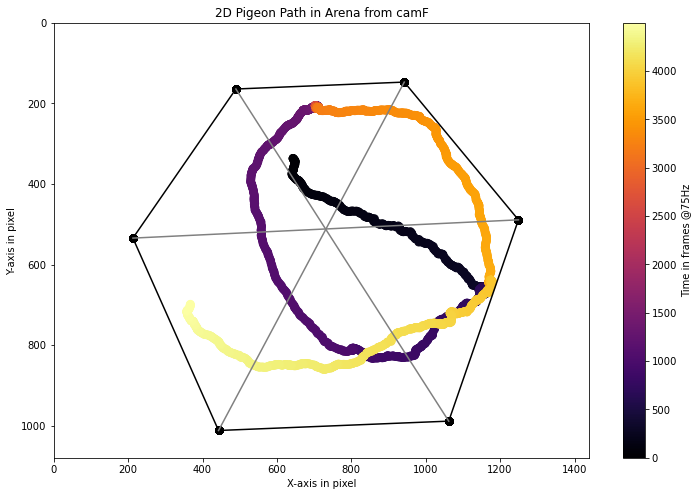

In [97]:
# define data
arena = df.iloc[:,0:18]
pigeon = df.loc[:, df.columns.str.contains('UHS')]

cam = file[-7:-3]

# select coordinates
arena_x = arena.loc[:,arena.columns.str.contains('_x')]
arena_y = arena.loc[:,arena.columns.str.contains('_y')]

pigeon_x = pigeon.loc[:,pigeon.columns.str.contains('_x')]
pigeon_y = pigeon.loc[:,pigeon.columns.str.contains('_y')]
t = [t for t in range(len(pigeon_x))]

#center = [770.8, 520.8]

x_border = np.append(np.array(arena_x)[0, :],np.array(arena_x)[0,0])
y_border = np.append(np.array(arena_y)[0, :],np.array(arena_y)[0,0])
d1x = np.append(np.array(arena_x)[0,0],np.array(arena_x)[0,3])
d1y = np.append(np.array(arena_y)[0,0],np.array(arena_y)[0,3])
d2x = np.append(np.array(arena_x)[0,1],np.array(arena_x)[0,4])
d2y = np.append(np.array(arena_y)[0,1],np.array(arena_y)[0,4])
d3x = np.append(np.array(arena_x)[0,2],np.array(arena_x)[0,5])
d3y = np.append(np.array(arena_y)[0,2],np.array(arena_y)[0,5])

# creating 2d figures
figure, ax = plt.subplots(figsize=(12, 8))

# creating the path map
img = plt.scatter(pigeon_x, pigeon_y, c = t, cmap = 'inferno', marker='o', s=60)

# plotting arena
plt.scatter(arena_x, arena_y, color='black', marker='h', s=60)
#plt.scatter(center[0], center[1], marker='h', color='gray')
plt.plot(x_border, y_border, color='black')

#plotting diagonals
plt.plot(d1x, d1y, color='gray')
plt.plot(d2x, d2y, color='gray')
plt.plot(d3x, d3y, color='gray')

# adding title and labels
ax.set_title(f"2D Pigeon Path in Arena from {cam}")
ax.set_xlabel('X-axis in pixel')
ax.set_ylabel('Y-axis in pixel')

ax.set_xlim(0,1440)
ax.set_ylim(1080,0)

# displaying plot
#figure.colorbar();
# displaying plot
cbar = plt.colorbar(img)
cbar.ax.set_ylabel('Time in frames @75Hz')

filename = f"2DPath_{cam}.png"
plt.savefig(filename, format = 'png', dpi=500)

plt.show()

## Check Triangulated Data in 3D

In [28]:
# read merged h5
file = tkinter.filedialog.askopenfilename(initialdir = "/",title = "Select a pose file:")
df = pd.read_csv(file)
df

,cA_x,cA_y,cA_z,cA_error,cA_ncams,cA_score,cB_x,cB_y,cB_z,cB_error,...,M_10,M_11,M_12,M_20,M_21,M_22,center_0,center_1,center_2,fnum
0,0.0,0.0,0.0,4.062387,6.0,0.999961,1140.054753,0.0,4.547474e-13,4.257522,...,0.113838,0.913038,-0.391666,0.006729,0.393511,0.919295,-590.503719,-1900.547077,1937.946886,0
1,0.0,0.0,0.0,4.062387,6.0,0.999961,1140.054753,0.0,4.547474e-13,4.257522,...,0.113838,0.913038,-0.391666,0.006729,0.393511,0.919295,-590.503719,-1900.547077,1937.946886,1
2,0.0,0.0,0.0,4.062387,6.0,0.999961,1140.054753,0.0,4.547474e-13,4.257522,...,0.113838,0.913038,-0.391666,0.006729,0.393511,0.919295,-590.503719,-1900.547077,1937.946886,2
3,0.0,0.0,0.0,4.062387,6.0,0.999961,1140.054753,0.0,4.547474e-13,4.257522,...,0.113838,0.913038,-0.391666,0.006729,0.393511,0.919295,-590.503719,-1900.547077,1937.946886,3
4,0.0,0.0,0.0,4.062387,6.0,0.999961,1140.054753,0.0,4.547474e-13,4.257522,...,0.113838,0.913038,-0.391666,0.006729,0.393511,0.919295,-590.503719,-1900.547077,1937.946886,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.0,0.0,0.0,4.062387,6.0,0.999961,1140.054753,0.0,4.547474e-13,4.257522,...,0.113838,0.913038,-0.391666,0.006729,0.393511,0.919295,-590.503719,-1900.547077,1937.946886,4495
4496,0.0,0.0,0.0,4.062387,6.0,0.999961,1140.054753,0.0,4.547474e-13,4.257522,...,0.113838,0.913038,-0.391666,0.006729,0.393511,0.919295,-590.503719,-1900.547077,1937.946886,4496
4497,0.0,0.0,0.0,4.062387,6.0,0.999961,1140.054753,0.0,4.547474e-13,4.257522,...,0.113838,0.913038,-0.391666,0.006729,0.393511,0.919295,-590.503719,-1900.547077,1937.946886,4497
4498,0.0,0.0,0.0,4.062387,6.0,0.999961,1140.054753,0.0,4.547474e-13,4.257522,...,0.113838,0.913038,-0.391666,0.006729,0.393511,0.919295,-590.503719,-1900.547077,1937.946886,4498


In [81]:
#%matplotlib qt
x = df.loc[:,df.columns.str.contains('_x')]
y = df.loc[:,df.columns.str.contains('_y')]
z = df.loc[:,df.columns.str.contains('_z')]

# creating 3d figures
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
#ax.view_init(60, 45)

# creating the path map
img = ax.scatter(x.iloc[0,:], y.iloc[0,:], z.iloc[0,:], marker='o', s=60)

# adding title and labels
ax.set_title("3D Pigeon Path in Arena")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# displaying plot
#fig.colorbar(img)
plt.show()


## Check physical lengths

In [78]:
# get coordinates for columnms
cA = np.array((df.loc[0,df.columns.str.contains('cA_x')], df.loc[0,df.columns.str.contains('cA_y')], df.loc[0,df.columns.str.contains('cA_z')]))
cB = np.array((df.loc[0,df.columns.str.contains('cB_x')], df.loc[0,df.columns.str.contains('cB_y')], df.loc[0,df.columns.str.contains('cB_z')]))
cC = np.array((df.loc[0,df.columns.str.contains('cC_x')], df.loc[0,df.columns.str.contains('cC_y')], df.loc[0,df.columns.str.contains('cC_z')]))
cD = np.array((df.loc[0,df.columns.str.contains('cD_x')], df.loc[0,df.columns.str.contains('cD_y')], df.loc[0,df.columns.str.contains('cD_z')]))
cE = np.array((df.loc[0,df.columns.str.contains('cE_x')], df.loc[0,df.columns.str.contains('cE_y')], df.loc[0,df.columns.str.contains('cE_z')]))
cF = np.array((df.loc[0,df.columns.str.contains('cF_x')], df.loc[0,df.columns.str.contains('cF_y')], df.loc[0,df.columns.str.contains('cF_z')]))

In [77]:
# print side lengths
print(f"Length A-B: {format(np.linalg.norm(cA - cB),'.2f')} mm or {format(np.linalg.norm(cA - cB)/1000,'.2f')} m")
print(f"Length B-C: {format(np.linalg.norm(cB - cC),'.2f')} mm or {format(np.linalg.norm(cB - cC)/1000,'.2f')} m")
print(f"Length C-D: {format(np.linalg.norm(cC - cD),'.2f')} mm or {format(np.linalg.norm(cC - cD)/1000,'.2f')} m")
print(f"Length D-E: {format(np.linalg.norm(cD - cE),'.2f')} mm or {format(np.linalg.norm(cD - cE)/1000,'.2f')} m")
print(f"Length E-F: {format(np.linalg.norm(cE - cF),'.2f')} mm or {format(np.linalg.norm(cE - cF)/1000,'.2f')} m")
print(f"Length F-A: {format(np.linalg.norm(cF - cA),'.2f')} mm or {format(np.linalg.norm(cF - cA)/1000,'.2f')} m")

Length A-B: 1140.05 mm or 1.14 m
Length B-C: 1140.87 mm or 1.14 m
Length C-D: 1138.16 mm or 1.14 m
Length D-E: 1132.76 mm or 1.13 m
Length E-F: 1129.89 mm or 1.13 m
Length F-A: 1139.87 mm or 1.14 m


In [76]:
# print diagonals
print(f"Length A-D: {format(np.linalg.norm(cA - cD),'.2f')} mm or {format(np.linalg.norm(cA - cD)/1000,'.2f')} m")
print(f"Length B-E: {format(np.linalg.norm(cB - cE),'.2f')} mm or {format(np.linalg.norm(cB - cE)/1000,'.2f')} m")
print(f"Length C-F: {format(np.linalg.norm(cC - cF),'.2f')} mm or {format(np.linalg.norm(cC - cF)/1000,'.2f')} m")

Length A-D: 2272.63 mm or 2.27 m
Length B-E: 2267.81 mm or 2.27 m
Length C-F: 2280.98 mm or 2.28 m
